In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
data=datasets.load_wine(as_frame=True)

In [5]:
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [6]:
x=data.data
y=data.target
names=data.target_names
names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
df=pd.DataFrame(x,columns=data.feature_names)
df['wine class']=data.target
df['wine class']=df['wine class'].replace(to_replace=[0,1,2],value=['class_0','class_1','class_2'])

In [9]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline wine class  
0                          3.92   1065.0    class_0  
1                          3.40   1050.0    class_0  
2                          3.17   1185.0    class_0  
3                          3.45   1480.0    class_0  
4                          2.93    735.0    class_0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

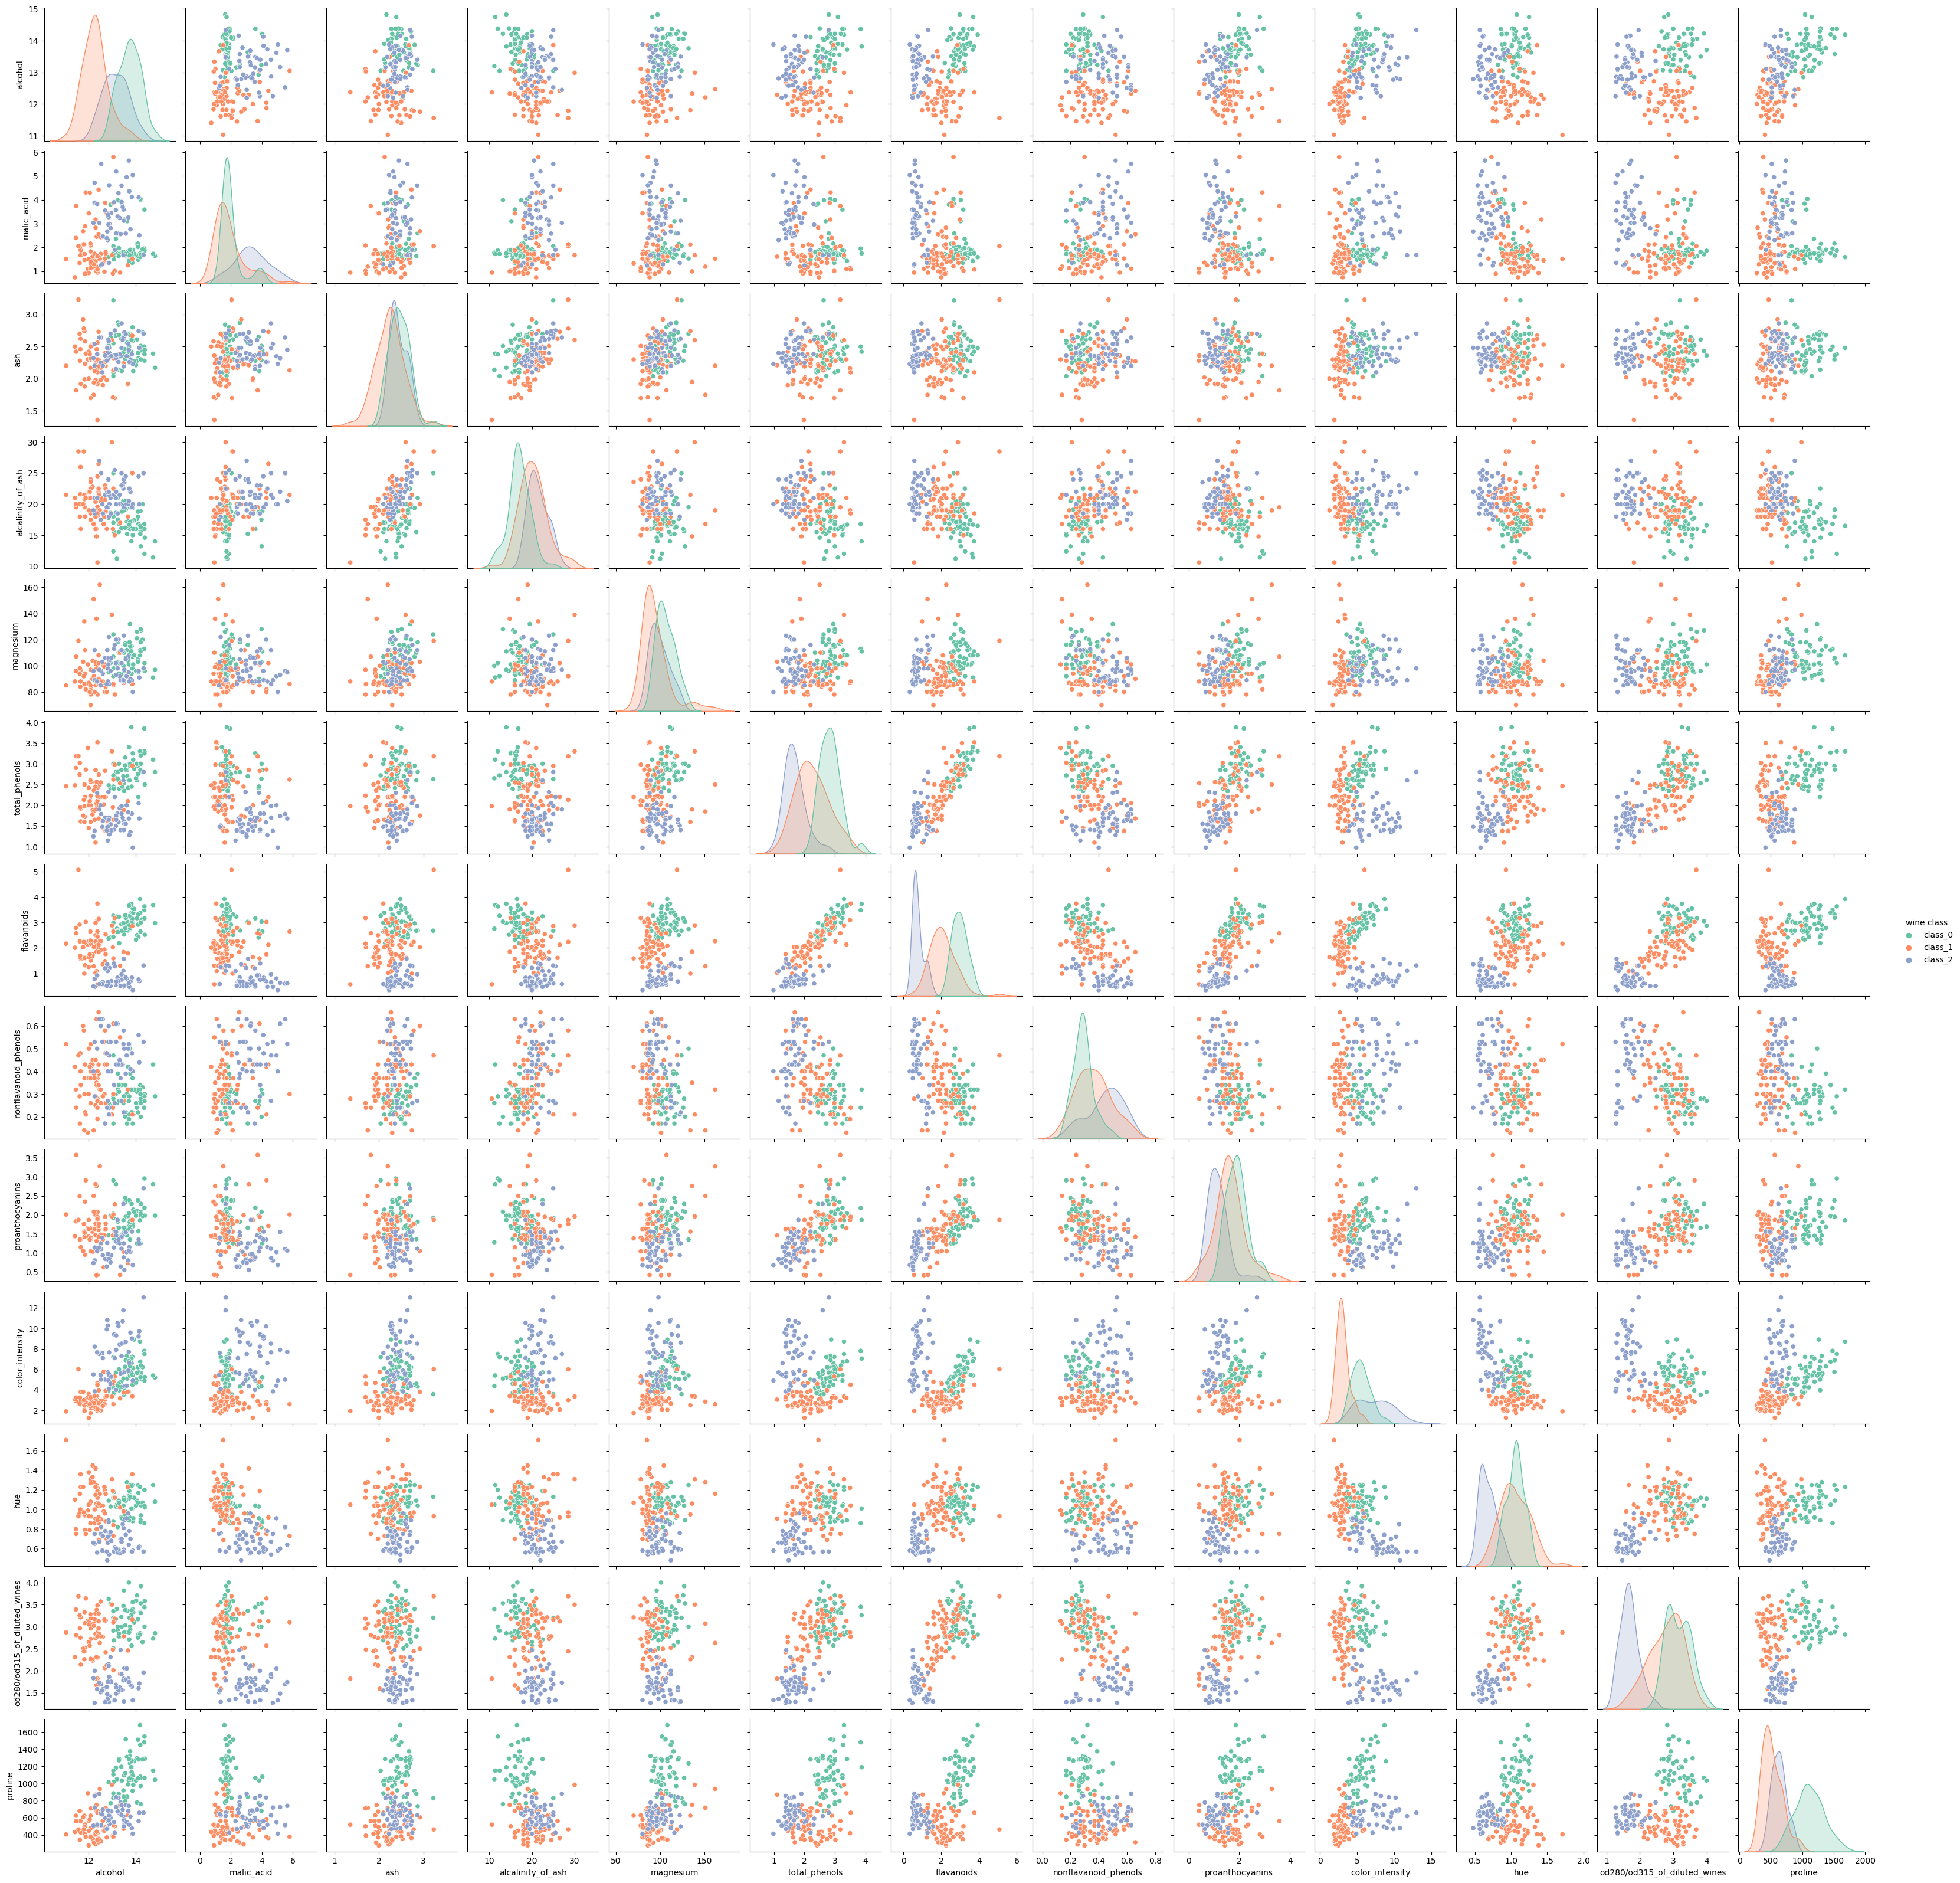

In [13]:
sns.pairplot(data=df,hue='wine class',palette='Set2')

In [14]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine class                      0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import math
math.sqrt(len(y_test))

7.3484692283495345

In [18]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.6481481481481481

In [22]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline wine class  
0                          3.92   1065.0    class_0  
1                          3.40   1050.0    class_0  
2                          3.17   1185.0    class_0  
3                          3.45   1480.0    class_0  
4                          2.93    735.0    class_0

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
knn1=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
knn1.fit(x_train,y_train)
pred2=knn1.predict(x_test)

In [26]:
metrics.accuracy_score(y_test,pred2)

0.9814814814814815